<a href="https://colab.research.google.com/github/PaulToronto/DataCamp---Finance-Fundamentals-in-Python/blob/main/2_4_Working_with_NASDAQ_Stock_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4 -Working with NASDAQ Stock Data

In [1]:
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime

## `aapl` Data

In [2]:
import yfinance as yf
import pandas as pd

In [3]:
aapl = yf.download('AAPL', start='2020-02-28', period='1mo', interval='1d', actions=False,auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [4]:
aapl.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-02-28,66.176750,68.339996,69.602501,64.092499,64.315002,426510000
2020-03-02,72.337845,74.702499,75.360001,69.430000,70.570000,341397200
2020-03-03,70.040451,72.330002,76.000000,71.449997,75.917503,319475600
2020-03-04,73.289261,75.684998,75.849998,73.282501,74.110001,219178400
2020-03-05,70.911972,73.230003,74.887497,72.852501,73.879997,187572800


In [5]:
# flatten index
aapl.columns = [col[0] for col in aapl.columns.values]

In [6]:
# add Trend column
aapl['Trend'] = aapl['Close'].diff().apply(lambda x: 'Up' if x > 0 else ('Down' if x < 0 else 'Flat'))
aapl

,Adj Close,Close,High,Low,Open,Volume,Trend
Date,,,,,,,
2020-02-28,66.176750,68.339996,69.602501,64.092499,64.315002,426510000,Flat
2020-03-02,72.337845,74.702499,75.360001,69.430000,70.570000,341397200,Up
2020-03-03,70.040451,72.330002,76.000000,71.449997,75.917503,319475600,Down
2020-03-04,73.289261,75.684998,75.849998,73.282501,74.110001,219178400,Up
2020-03-05,70.911972,73.230003,74.887497,72.852501,73.879997,187572800,Down
2020-03-06,69.970253,72.257500,72.705002,70.307503,70.500000,226176800,Down
2020-03-09,64.436142,66.542503,69.522499,65.750000,65.937500,286744800,Down
2020-03-10,69.076950,71.334999,71.610001,67.342499,69.285004,285290000,Up
2020-03-11,66.677864,68.857498,70.305000,67.964996,69.347504,255598800,Down


In [7]:
aapl = aapl[['Close', 'Volume', 'Trend']]
aapl.columns = ['Price', 'Volume', 'Trend']
aapl

,Price,Volume,Trend
Date,,,
2020-02-28,68.339996,426510000,Flat
2020-03-02,74.702499,341397200,Up
2020-03-03,72.330002,319475600,Down
2020-03-04,75.684998,219178400,Up
2020-03-05,73.230003,187572800,Down
2020-03-06,72.257500,226176800,Down
2020-03-09,66.542503,286744800,Down
2020-03-10,71.334999,285290000,Up
2020-03-11,68.857498,255598800,Down


## `.head()`, `tail()`, `describe()`

In [8]:
aapl.head(7)

,Price,Volume,Trend
Date,,,
2020-02-28,68.339996,426510000,Flat
2020-03-02,74.702499,341397200,Up
2020-03-03,72.330002,319475600,Down
2020-03-04,75.684998,219178400,Up
2020-03-05,73.230003,187572800,Down
2020-03-06,72.257500,226176800,Down
2020-03-09,66.542503,286744800,Down


In [9]:
aapl.tail(7)

,Price,Volume,Trend
Date,,,
2020-03-19,61.195000,271857200,Down
2020-03-20,57.310001,401693200,Down
2020-03-23,56.092499,336752800,Down
2020-03-24,61.720001,287531200,Up
2020-03-25,61.380001,303602000,Down
2020-03-26,64.610001,252087200,Up
2020-03-27,61.935001,204216800,Down


In [10]:
aapl.describe()

,Price,Volume
count,21.000000,2.100000e+01
mean,65.928929,3.019811e+08
std,5.840149,6.679980e+07
min,56.092499,1.875728e+08
25%,61.667500,2.555988e+08
50%,64.610001,3.002336e+08
75%,71.334999,3.367528e+08
max,75.684998,4.265100e+08


## Using `include`, `exclude` and `percentile` arguments of `.describe()`

In [11]:
aapl.describe(include='object')

,Trend
count,21
unique,3
top,Down
freq,13


In [12]:
aapl.describe(include='all')

,Price,Volume,Trend
count,21.000000,2.100000e+01,21
unique,NaN,NaN,3
top,NaN,NaN,Down
freq,NaN,NaN,13
mean,65.928929,3.019811e+08,NaN
std,5.840149,6.679980e+07,NaN
min,56.092499,1.875728e+08,NaN
25%,61.667500,2.555988e+08,NaN
50%,64.610001,3.002336e+08,NaN
75%,71.334999,3.367528e+08,NaN


In [13]:
aapl.describe(include=['float', 'object'])

,Price,Trend
count,21.000000,21
unique,NaN,3
top,NaN,Down
freq,NaN,13
mean,65.928929,NaN
std,5.840149,NaN
min,56.092499,NaN
25%,61.667500,NaN
50%,64.610001,NaN
75%,71.334999,NaN


In [14]:
aapl.describe(percentiles=[.1, .5, .9])

,Price,Volume
count,21.000000,2.100000e+01
mean,65.928929,3.019811e+08
std,5.840149,6.679980e+07
min,56.092499,1.875728e+08
10%,60.552502,2.191784e+08
50%,64.610001,3.002336e+08
90%,73.230003,4.016932e+08
max,75.684998,4.265100e+08


In [15]:
aapl.describe(exclude='float')

,Volume,Trend
count,2.100000e+01,21
unique,NaN,3
top,NaN,Down
freq,NaN,13
mean,3.019811e+08,NaN
std,6.679980e+07,NaN
min,1.875728e+08,NaN
25%,2.555988e+08,NaN
50%,3.002336e+08,NaN
75%,3.367528e+08,NaN


## Three stocks dataset

In [16]:
stocks3 = yf.download(['AAPL', 'AMZN', 'TSLA'],
                      start='2020-02-28', period='6mo', interval='1d', actions=False,auto_adjust=False)

[*********************100%***********************]  3 of 3 completed


In [17]:
stocks3 = stocks3['High']
stocks3

Ticker,AAPL,AMZN,TSLA
Date,,,
2020-02-28,69.602501,94.487999,46.034668
2020-03-02,75.360001,97.725502,49.579334
2020-03-03,76.000000,99.816498,53.798668
2020-03-04,75.849998,98.900002,51.101334
2020-03-05,74.887497,98.036003,49.716667
...,...,...,...
2020-08-21,124.867500,165.720001,139.699326
2020-08-24,128.785004,169.016006,141.933334
2020-08-25,125.180000,167.869995,135.196671


In [18]:
stocks3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2020-02-28 to 2020-08-27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    127 non-null    float64
 1   AMZN    127 non-null    float64
 2   TSLA    127 non-null    float64
dtypes: float64(3)
memory usage: 4.0 KB


In [19]:
# Turn the index into a column
stocks3 = stocks3.reset_index()
stocks3

Ticker,Date,AAPL,AMZN,TSLA
0,2020-02-28,69.602501,94.487999,46.034668
1,2020-03-02,75.360001,97.725502,49.579334
2,2020-03-03,76.000000,99.816498,53.798668
3,2020-03-04,75.849998,98.900002,51.101334
4,2020-03-05,74.887497,98.036003,49.716667
...,...,...,...,...
122,2020-08-21,124.867500,165.720001,139.699326
123,2020-08-24,128.785004,169.016006,141.933334
124,2020-08-25,125.180000,167.869995,135.196671
125,2020-08-26,126.992500,172.587006,144.399994


In [20]:
stocks3['Date'] = pd.to_datetime(stocks3['Date'])
stocks3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    127 non-null    datetime64[ns]
 1   AAPL    127 non-null    float64       
 2   AMZN    127 non-null    float64       
 3   TSLA    127 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.1 KB


In [21]:
# from wide to long
stocks3 = pd.melt(stocks3,
                  id_vars=['Date'],
                  var_name='Symbol',
                  value_name='High')

In [22]:
stocks3.describe()

,Date,High
count,381,381.000000
mean,2020-05-29 05:51:29.763779584,94.815645
min,2020-02-28 00:00:00,26.990667
25%,2020-04-14 00:00:00,67.333336
50%,2020-05-29 00:00:00,94.654999
75%,2020-07-15 00:00:00,120.550003
max,2020-08-27 00:00:00,172.649994
std,NaN,35.186706


In [23]:
stocks3.describe(include='object')

,Symbol
count,381
unique,3
top,AAPL
freq,127


## Filtering data

In [24]:
mask = stocks3['Symbol'] == 'AAPL'
mask

,Symbol
0,True
1,True
2,True
3,True
4,True
...,...
376,False
377,False
378,False
379,False


In [25]:
aapl = stocks3.loc[mask]
aapl

,Date,Symbol,High
0,2020-02-28,AAPL,69.602501
1,2020-03-02,AAPL,75.360001
2,2020-03-03,AAPL,76.000000
3,2020-03-04,AAPL,75.849998
4,2020-03-05,AAPL,74.887497
...,...,...,...
122,2020-08-21,AAPL,124.867500
123,2020-08-24,AAPL,128.785004
124,2020-08-25,AAPL,125.180000
125,2020-08-26,AAPL,126.992500


In [26]:
aapl.describe(include='object')

,Symbol
count,127
unique,1
top,AAPL
freq,127


In [27]:
big_prices = stocks3.loc[stocks3['High'] > 90]
big_prices

,Date,Symbol,High
80,2020-06-23,AAPL,93.095001
81,2020-06-24,AAPL,92.197502
82,2020-06-25,AAPL,91.250000
83,2020-06-26,AAPL,91.330002
84,2020-06-29,AAPL,90.542503
...,...,...,...
376,2020-08-21,TSLA,139.699326
377,2020-08-24,TSLA,141.933334
378,2020-08-25,TSLA,135.196671
379,2020-08-26,TSLA,144.399994


In [28]:
big_prices.describe()

,Date,High
count,210,210.000000
mean,2020-06-24 01:36:00,120.802908
min,2020-02-28 00:00:00,90.542503
25%,2020-05-18 06:00:00,99.248123
50%,2020-07-09 12:00:00,118.533752
75%,2020-08-04 00:00:00,135.115379
max,2020-08-27 00:00:00,172.649994
std,NaN,23.279693


## Pandas Boolean operators

- `&`: and
- `|`: or
- `~`: not

In [29]:
stocks3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    381 non-null    datetime64[ns]
 1   Symbol  381 non-null    object        
 2   High    381 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 9.1+ KB


In [30]:
amzn = stocks3.loc[(stocks3['Symbol'] == 'AMZN') & (stocks3['Date'] > datetime(2020, 4, 1))]
amzn

,Date,Symbol,High
151,2020-04-02,AMZN,96.376503
152,2020-04-03,AMZN,96.316498
153,2020-04-06,AMZN,99.926003
154,2020-04-07,AMZN,101.786003
155,2020-04-08,AMZN,102.199997
...,...,...,...
249,2020-08-21,AMZN,165.720001
250,2020-08-24,AMZN,169.016006
251,2020-08-25,AMZN,167.869995
252,2020-08-26,AMZN,172.587006


In [31]:
amzn.describe(exclude='float')

,Date,Symbol
count,103,103
unique,NaN,1
top,NaN,AMZN
freq,NaN,103
mean,2020-06-15 13:30:52.427184384,NaN
min,2020-04-02 00:00:00,NaN
25%,2020-05-09 12:00:00,NaN
50%,2020-06-16 00:00:00,NaN
75%,2020-07-22 12:00:00,NaN
max,2020-08-27 00:00:00,NaN


In [32]:
stocks3.describe(include=['datetime', 'object'])

,Date,Symbol
count,381,381
unique,NaN,3
top,NaN,AAPL
freq,NaN,127
mean,2020-05-29 05:51:29.763779584,NaN
min,2020-02-28 00:00:00,NaN
25%,2020-04-14 00:00:00,NaN
50%,2020-05-29 00:00:00,NaN
75%,2020-07-15 00:00:00,NaN
max,2020-08-27 00:00:00,NaN


## Plotting data

## Exxon Data

In [33]:
file_path = 'https://raw.githubusercontent.com/PaulToronto/'
file_path += 'DataCamp---Finance-Fundamentals-in-Python/refs/heads/main/data/XOM.US_MN1.csv'

exxon = pd.read_csv(file_path)
exxon

,datetime,open,high,low,close,volume
0,1999-12-01,79.25,86.56,79.25,80.56,103499500
1,2000-01-01,79.50,86.31,76.50,83.44,118916200
2,2000-02-01,83.31,84.88,69.87,75.32,99185900
3,2000-03-01,75.38,82.00,72.00,78.19,131979400
4,2000-04-01,77.75,83.13,75.00,77.75,95073100
...,...,...,...,...,...,...
287,2023-11-01,106.53,109.19,101.15,102.76,333023786
288,2023-12-01,102.77,104.22,97.48,99.98,361832437
289,2024-01-01,100.92,104.57,100.85,102.63,67234210
290,2024-02-01,102.81,104.01,101.61,101.97,42567810


In [34]:
exxon['datetime'] = pd.to_datetime(exxon['datetime'])
exxon['Month'] = exxon['datetime'].dt.strftime('%b')
exxon

,datetime,open,high,low,close,volume,Month
0,1999-12-01,79.25,86.56,79.25,80.56,103499500,Dec
1,2000-01-01,79.50,86.31,76.50,83.44,118916200,Jan
2,2000-02-01,83.31,84.88,69.87,75.32,99185900,Feb
3,2000-03-01,75.38,82.00,72.00,78.19,131979400,Mar
4,2000-04-01,77.75,83.13,75.00,77.75,95073100,Apr
...,...,...,...,...,...,...,...
287,2023-11-01,106.53,109.19,101.15,102.76,333023786,Nov
288,2023-12-01,102.77,104.22,97.48,99.98,361832437,Dec
289,2024-01-01,100.92,104.57,100.85,102.63,67234210,Jan
290,2024-02-01,102.81,104.01,101.61,101.97,42567810,Feb


In [35]:
exxon = exxon.loc[
    (exxon['datetime'] >= datetime(2015, 5, 1)) &
    (exxon['datetime'] <= datetime(2019, 12, 1))
    ]
exxon = exxon[['datetime', 'high', 'volume', 'Month']]
exxon.columns = ['Date', 'High', 'Volume', 'Month']
exxon

,Date,High,Volume,Month
185,2015-05-01,90.09,154028516,May
186,2015-06-01,85.97,179806135,Jun
187,2015-07-01,83.53,221706896,Jul
188,2015-08-01,79.29,322062591,Aug
189,2015-09-01,75.47,253064965,Sep
190,2015-10-01,83.88,257846795,Oct
191,2015-11-01,87.44,207295494,Nov
192,2015-12-01,82.13,285979543,Dec
193,2016-01-01,79.92,329174089,Jan
194,2016-02-01,83.44,286478197,Feb


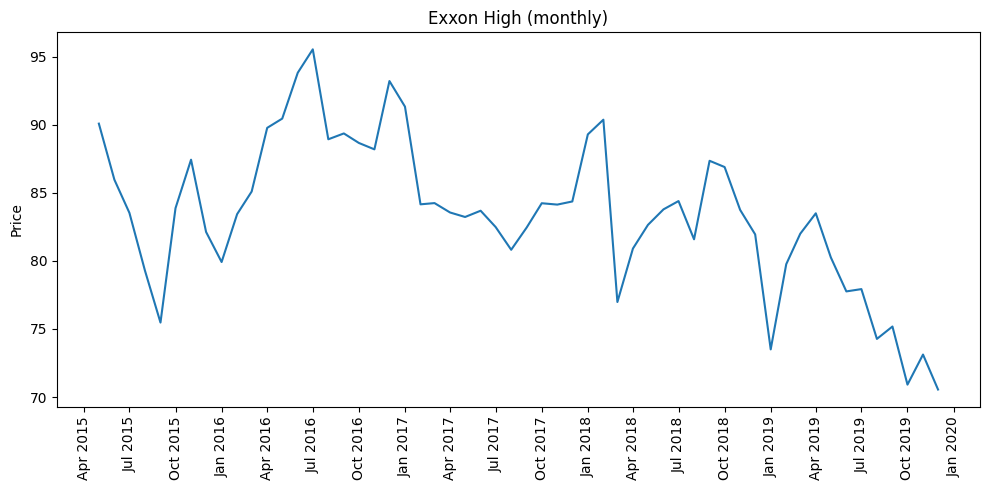

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    exxon['Date'],
    exxon['High']
)

# Quarterly ticks + formatter
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

ax.set_title('Exxon High (monthly)')
ax.set_ylabel('Price')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

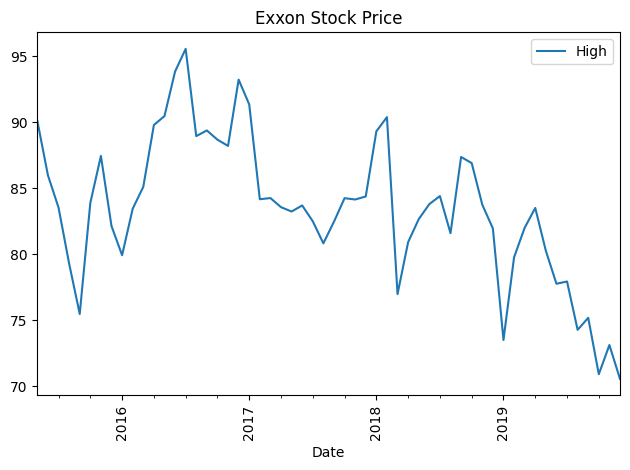

In [37]:
exxon.plot(
    x = 'Date',
    y = 'High',
    rot=90,
    title='Exxon Stock Price'
)

plt.tight_layout()
plt.show()

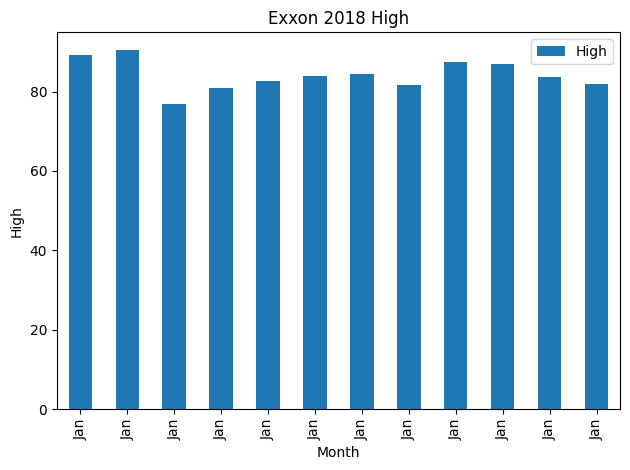

In [38]:
from re import X
exxon_2018 = exxon.loc[exxon['Date'].dt.year == 2018]

ax = exxon_2018.plot(
    x = 'Date',
    y = 'High',
    rot=90,
    kind='bar',
    title='Exxon 2018 High',
    xlabel='Month',
    ylabel='High'
)

# format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

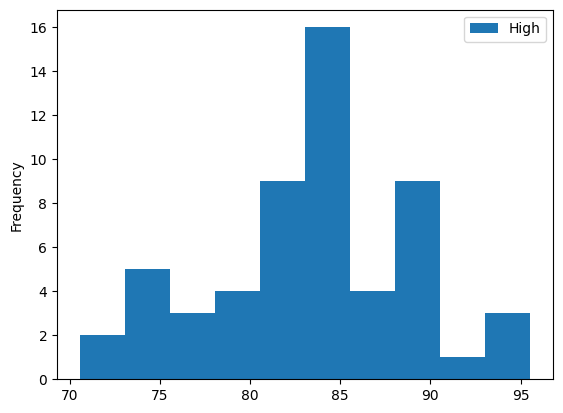

In [39]:
exxon.plot(y='High', kind='hist');